# Viikko 1


Olin paikalla ensimmäisellä luennolla 9.3., jolloin luennolla käytiin läpi kurssin sisältöä sekä suoritusvaatimuksia ja tutustuttiin datatieteen perusteisiin. Vaikka luennolla ei tullut itselleni paljoakaan uutta asiaa, luento kasvatti mielenkiintoani ja motivaatiotani kurssin suorittamista kohtaan.

Tietojohtamisen opiskelijana moni asia oli minulle tuttua, esimerkiksi tiedon tasot ja luennolla esitetyt mallit (Data Science Lifecyclen lisäksi myös CRISP-DM-malli esitellään TIJO.220 Basics for Business Data Analytics-kurssilla), mutta mukana oli myös hieman uusia näkökulmia. Muita malleja, joihin kursseilla on viitattu, ovat esimerkiksi APREM-DM ja LTDM. Suoritan tällä hetkellä TIJO.324 Data-analytiikka päätöksenteossa-kurssia, jossa aloitusluennolla käytiin hyvin samanlaisia teemoja läpi, mutta esimerkiksi datatieteilijän kompetensseissa oli huomioitu vain matematiikka, ohjelmointi ja liiketoiminta. Mielestäni tämän kurssin materiaalissa esitetty Venn-diagrammi antaa todenmukaisemman kuvan, sillä viestintä on todella tärkeä taito datatieteilijälle: Analyysin tulokset on osattava viestiä ja visualisoida onnistuneesti, jotta niistä on päätöksentekijöille hyötyä. Vaikka koko muu data-analytiikan prosessi oltaisiin tehty täydellisesti, voi huono viestintä aiheuttaa sen, että saavutettu hyöty on yhtä tyhjän kanssa.

Luentomateriaalissa esiin tuotu Hans Roslingin video on erinomainen, ja tuo hyvin esiin sen, että datatieteilijällä on valta valita, millaisesta näkökulmasta hän lähtee tutkimaan dataa. Analyytikon valinnoilla voi olla suuri vaikutus, siihen miltä löydökset näyttävät lopussa, vaikka hän ei itse edes huomaisi, miten on lopputulokseen vaikuttanut. Tähän liittyy vahvasti dataan liittyvät eettiset kysymykset, joita Lou ja Yang (2020) käsittelivät artikkelissaan. Erityisesti terveystietoja käsittelevä data on mielestäni hyvin arkaluonteista ja artikkelissa olikin tästä hyvä esimerkki, kuinka apteekit ovat käyttäneet saamaansa terveysdataa markkinoidakseen tuotteita kohdistetusti.

Viittaus etnografiaan oli mielenkiintoinen. Olen sivuaineena opiskellut sosiaalitieteitä ja muun muassa antropologiaa, jossa etnografinen tutkimus on aivan keskiössä. Ennen vertauksen kuulemista pidin antropologin ja data-analyytikon työtehtäviä suurin piirtein niin erilaisina kuin mahdollista, mutta on hyvinkin totta, että dataa tutkiessa on ymmärrettävä mistä se on peräisin, millaisia asioita datasta halutaan selvittää eli millainen data on arvokasta ja tärkeää sekä ymmärtää ympäröivä liiketoimintakonteksti. Samoin antropologi haluaa ihmisryhmää seuratessaan oppia ymmärtämään ryhmän historiaa, arvoja, kulttuuria ja ympäristöä. Metodit ihmisryhmien ja datan tutkimiseen voivat olla erilaiset, mutta ydinkysymykset tutkimisessa ovat yllättävän lähellä toisiaan. Koska aihe oli niin mielenkiintoinen, tutustuin luennolla vinkattuun Lindgrenin "Data Theory"-kirjaan (kirja löytyi Andorista). Kirjassa korostettiin muun muassa sitä, että laadullisia ja määrällisiä menetelmiä voi olla vaikea soveltaa yhdessä, mutta tällainen tutkimus olisi ensiarvoisen tärkeää, sillä ilman molempia tutkimustapoja esimerkiksi sosiaalisista ilmiöistä tulee yksipuolinen kuva.

Tavoitteinani kurssille on oppia käyttämään uusia työkaluja (mm. Jupyter Notebook, Pandas), parantaa koodaustaitojani, oppia koneoppimisen perusteita ja harjoitella harjoitustyön kautta, miten käytännössä data-analytiikkaa voidaan tehdä. Tekninen osaamiseni ei ole kovin vahvaaa, joten pyrin keskittymään kurssilla erityisten uusien työkalujen oppimiseen ja teknisen ymmärtämisen kasvattamiseen.

Seuraavaki teen yksinkertaisia koodiajoja demo-sessiossa oppimani pohjalta. Koodien pohjana käytetään demosessiossa käytettyjä koodeja.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [6]:
url = 'https://github.com/jodatut/2020/raw/master/koodiesimerkit/SalesJan2009.csv'

orig_df = pd.read_csv(url)

# Tehdään kopio, jotta alkuperäinen data säilyy
df = orig_df.copy()
print('List of attributes:', df.columns.values.tolist())

List of attributes: ['Transaction_date', 'Product', 'Price', 'Payment_Type', 'Name', 'City', 'State', 'Country', 'Account_Created', 'Last_Login', 'Latitude', 'Longitude']


In [13]:
# Selvitetään, missä maissa transaktioita on tehty
countries = []
def country_list(x):
    for x in df['Country']:
        if x in countries:
            pass
        else:
            countries.append(x)
            
country_list(df['Country'])
        
print (countries)  

['United Kingdom', 'United States', 'Australia', 'Israel', 'France', 'Netherlands', 'Ireland', 'Canada', 'India', 'South Africa', 'Finland', 'Switzerland', 'Denmark', 'Belgium', 'Sweden', 'Norway', 'Luxembourg', 'Italy', 'Germany', 'Moldova', 'Spain', 'United Arab Emirates', 'Bahrain', 'Turkey', 'Kuwait', 'Malta', 'Hungary', 'Austria', 'Jersey', 'Malaysia', 'Iceland', 'South Korea', 'Brazil', 'New Zealand', 'Russia', 'Monaco', 'Hong Kong', 'Thailand', 'Bulgaria', 'Latvia', 'Poland', 'Philippines', 'Argentina', 'The Bahamas', 'Japan', 'Czech Republic', 'Cayman Isls', 'Ukraine', 'Dominican Republic', 'China', 'Greece', 'Costa Rica', 'Bermuda', 'Romania', 'Guatemala', 'Mauritius']


In [16]:
#Tehdään maakohtainen pylväsdiagrammi transaktioihin käytetyn rahan mukaan, jossa mukana 5 suosituinta maata

# Selvitetään, kuinka paljon transaktioita on missäkin maassa
payment_values = df['Country'].value_counts()
print(payment_values)

United States           464
United Kingdom          101
Canada                   76
Ireland                  49
Australia                38
Switzerland              36
France                   27
Germany                  25
Netherlands              22
Norway                   16
Denmark                  15
Italy                    15
Sweden                   13
Spain                    12
Belgium                   8
Austria                   7
Turkey                    6
New Zealand               6
United Arab Emirates      6
South Africa              5
Brazil                    5
Hungary                   3
Czech Republic            3
Philippines               2
Poland                    2
The Bahamas               2
Finland                   2
Japan                     2
Malta                     2
India                     2
Thailand                  2
Monaco                    2
Cayman Isls               1
Bermuda                   1
Guatemala                 1
Ukraine             

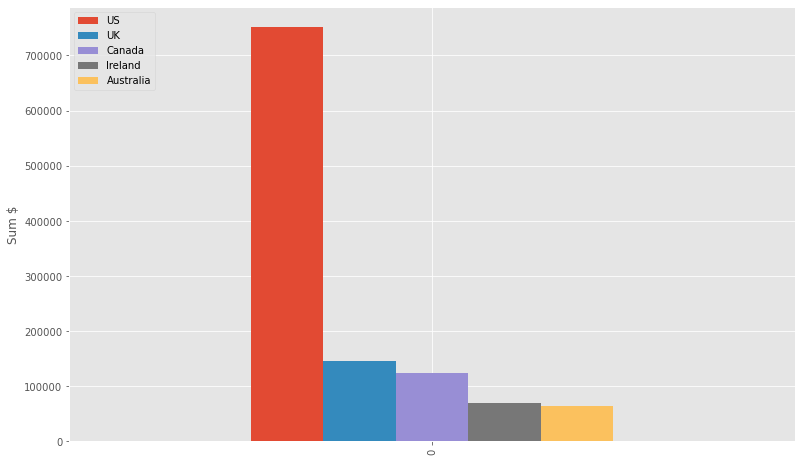

In [17]:
US = df.loc[:,['Price', 'Country']]
US = US[US['Country'] == 'United States']

UK = df.loc[:,['Price', 'Country']]
UK = UK[UK['Country'] == 'United Kingdom']

Canada = df.loc[:,['Price', 'Country']]
Canada = Canada[Canada['Country'] == 'Canada']

Ireland = df.loc[:,['Price', 'Country']]
Ireland = Ireland[Ireland['Country'] == 'Ireland']

Australia = df.loc[:,['Price', 'Country']]
Australia = Australia[Australia['Country'] == 'Australia']

sum_US = sum(US['Price'])
sum_UK = sum(UK['Price'])
sum_Canada = sum(Canada['Price'])
sum_Ireland = sum(Ireland['Price'])
sum_Australia = sum(Australia['Price'])

df_plot = pd.DataFrame([[sum_US, sum_UK, sum_Canada, sum_Ireland, sum_Australia]])
df_plot.columns = ['US', 'UK', 'Canada', 'Ireland', 'Australia']

df_plot.plot.bar(figsize=(13,8))

plt.legend(loc=2)
plt.ylabel('Sum $')
plt.show()

Viisi tärkeintä asiaa tältä viikolta:
1. Viestinnän rooli data-analytiikan prosessissa jää helposti huomiotta, vaikka se on todella tärkeä
2. Jupyter Notebook on datan kanssa työskentelyyn hyvä työkalu, ja sillä on helppoa sekä ajaa koodia että tehdä visualisointeja
3. CRISP-DM on yksi tunnetuimmista ja suosituimmista prosessikuvauksista, jota käytetään dataprosesseissa
4. Datan kanssa työskentelevillä on myös vastuu datan käytöstä ja eettiset näkökulmiin kannattaa kiinnittää huomiota
5. Etnografialla ja datatieteellä voidaan nähdä yllättäviä yhtäläisyyksiä

Lähteet:
- Luento 9.3. (paikan päällä) + demosessio (katsottu tallenteelta)
- Lou & Yang (2020) "A Beginner's Guide to Data Ethics" Saatavilla: https://medium.com/big-data-at-berkeley/things-you-need-to-know-before-you-become-a-data-scientist-a-beginners-guide-to-data-ethics-8f9aa21af742
- Rosling "The best stats you've ever seen" TED-talk Saatavilla: https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen
- Lindgren (2020) "Data Theory: Interpretive Sociology and Computational Methods"

# Viikko 2

Tällä viikolla kävimme aluksi vielä lyhyesti läpi erilaisia prosessimalleja, joita voidaan hyödyntää data-analyysissa. Vaikka asia ei ollut minulle täysin uutta, luento muistutti datan jalostamisen tärkeydestä ja siitä, että siihen kuluu usein suurin osa käytettävästä ajasta. Lisäksi luennoitsija antoi hyvän muistutuksen siitä, että datan jalostajan ennakko-oletukset vaikuttavat siihen, miten dataa jalostetaan. Tämä on mielestäni äärimmäisen tärkeää tiedostaa.

Luennon ennakkolukemisena oli Scott Berinaton (2019) artikkeli, joka oli mielestäni hyvin mielenkiintoinen. Artikkelissa kuvattiin datatieteen muuttumista ajan saatossa ja analytiikkaprosessissa vastaan tulevia suurimpia ongelmia, jotka liittyvät usein raportointiin ja tulosten esittämiseen. Tämä johtuu siitä, että päätösten tekijät ja data-analyytikot eivät välttämättä ymmärrä toisiaan ja liiketoiminnan näkökulma ei välttämättä ole ollut prosessissa tarpeeksi suuressa valossa. Suurin oivallus artikkelissa oli itselleni kuitenkin se, että dataprojektitiimiä muodostettaessa kannattaa keskittyä ammattinimikkeiden sijaan ihmisten taitoihin, eli sen sijaan että tiimiin etsitään data-analyytikkoa, datainsinööriä ja designeria, etsitään projektiin taitoja projektin hallinnasta, datan käsittelystä, data-analyysista, tarinan kerronnasta ja niin edelleen. Tämä oli mielestäni virkistävä näkökulma ja ottaa hyvin huomioon sen, että esimerkiksi jokaisella yksilöllä on omat vahvuutensa. Vaikka nykyisillä opinnoillani tähtään data-analyytikon ammattiin, valmistuin muutamia vuosia sitten filosofian maisteriksi monikielisestä viestinnästä. Toivon, että tulevaisuuden työpaikassani minua ei nähtäisi pelkän "data-analyytikon"-tittelin kautta, vaan pystyisin mahdollisuuksien mukaan hyödyntämään myös viestinnän osaamistani. Luennollakin pohdimme, että kannattaako mieluummin erikoistua niin, että osaa jonkin asian todella hyvin, vai onko parempi omata laaja osaaminen eri asioista, jotka eivät mene niin syvälle. Itse kannatan jälkimmäistä ja nykyään työelämässä on tärkeää kehittää omaa osaamistaan jatkuvasti, joten on tärkeää myös oppia, miten uusia asioita opitaan ja olla motivoitunut tekemään niin.


Luennolla mainittiin lyhyesti "unknown unknows" ja mustat joutsenet. Molemmat termit ovat itselleni tuttuja, ja pidän tärkeänä, että esimerkiksi tiedostamattomien ei-tiedettyjen asioiden (tai mikä ikinä olisikaan näppärä käännös...) olemassaolo tiedostetaan. Tällä en tarkoita, että nämä asiat pyrittäisiin kaikin keinoin löytämään, sillä se ei ole mahdollista, vaan oltaisiin tietoisia, että esimerkiksi projektin aikana vastaan voi tulla asioita, joihin ei voida varautua. Tietynlainen ketteryys ja resilienssi on siis pidettävä mielessä, vaikka projektin suunnittelu tehtäisiin mahdollisimman huolellisesti. Hyvä keino on suosittu "scrum", jota käytetään esimerkiksi ohjelmistoprojekteissa. Scrumin mukaan ohjelmaa luodaan pieni osa kerrallaan, ja tämä mahdollistaa tarvittaessa nopeat ja ketterät muutokset projektissa. Mustat joutsenet ovat puolestaan itselleni tuttu termi Talebin (2007) kirjoittamasta kirjasta "Musta joutsen: Erittäin epätodennäköisen vaikutus". Mustat joutsenet ovat odottamattomia ja erittäin epätodennäköisiä tapahtumia, joita Talebin mukaan kuitenkin todennäköisesti tapahtuu. Taleb käyttää kirjassaan esimerkkiä 9/11-iskusta, mutta mustiksi joutseniksi voidaan nähdä myös COVID-19 ja Ukrainan sota.

Tällä viikolla opimme raapijoista ja ryömijöistä. Molemmat termit olivat itselleni uusia. Raapijoilla ja ryömijöillä saadaan kerättyä nettisivuilta dataa automatisoidusti. Ryömijä käy nettiosoitteita järjestelmällisesti läpi ja raapija kerää nettisivuilla olevat tiedot. Raapijoiden ja ryömijöiden käytössä on kuitenkin otettava huomioon niiden eettisyys: Osa nettisivuista ei halua, että niiden sisältöä kerätään. Tämä johtuu muun muassa siitä, että raavintaa käytetään usein tavoitteena saada liiketoiminnallista hyötyä, raavinnassa ei huomioida tekijänoikeuslakia tai sivujen käyttöehtoja ja raavinta voi olla nettisivulle haitallista, esimerkiksi lisätä sivun kuormitusta ja kiertää turvallisuustoimia (Bernard 2017).

Seuraavaksi harjoittelin scrapy-kirjaston käyttöä demosession pohjalta. Yritin ensin käyttää osoitteena Tripadvisoria, mutta en saanut koodia jostain syystä toimimaan, joten lopulta päätin käyttää samanlaista koodia kuin koodiklinikalla.

In [2]:
!scrapy genspider amazon_scraper1 amazon.com

import scrapy

class AmazonScraperSpider(scrapy.Spider):
    name = 'amazon_scraper'
    allowed_domains = ['amazon.com']
    sstart_urls = ['https://www.amazon.com/Apple-iPhone-Verizon-Unlocked-Renewed/product-reviews/B07HYDFX8G/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=helpful&pageNumber=1%27]']
    
    def parse(self, response):
        
        review_texts = response.css('.a-size-base.review-text')
        
        for i in range(len(review_texts)):
            review_texts[i] = "".join(review_texts[i].css('::text').extract()).strip()

        review_ratings = response.css('[data-hook="review-date"] > span::text').extract()

        for i in range(len(review_texts)):
            review = {
                'text' : review_texts[i],
                'date': review_date[i]
            }
            yield review
         next_page_url = response.css('.a-last > a::attr(href)').extract_first()
        yield response.follow(next_page_url, self.parse)   
        

Created spider 'amazon_scraper1' using template 'basic' 


Viisi tärkeää asiaa
1. Raapijat ja ryömijät keräävät dataa nettisivuilta automaattisesti
2. Niiden käyttö ei kuitenkaan aina ole eettistä
3. Liiketoiminnan näkökulman olisi syytä olla vahvasti mukana kaikessa yrityksissä tehtävässä data-analytiikassa
4. Titteleiden sijaan pitäisi keskittyä kompetensseihin
5. On todennäköistä, että maailmassa tapahtuu kaikenlaista epätodennäköistä

Lähteet:
- Luento 16.3. (katsottu tallenteelta) + demosessio 18.3. (katsottu tallenteelta) 
-Berinato, S (2019). "Data Science and the Art of Persuasion". Harvard Business Review. Saatavilla:https://hbr.org/2019/01/data-science-and-the-art-of-persuasion?utm_campaign=hbr&utm_medium=social&utm_source=twitter 
-Bernard, B (2017). "Web Scraping and Crawling Are Perfectly Legal, Right?" Blogiteksti. Saatavilla: https://benbernardblog.com/web-scraping-and-crawling-are-perfectly-legal-right/
-Taleb, N (2007). "Musta joutsen: Erittäin epätodennäköisen vaikutus". Helsinki: Terra Cognita.

# Viikko 3

Ennen luentoa tehtävänä oli lukea Huhtamäen ja Laaksosen artikkeli, joka esitteli erilaisia piirteitä, joita voidaan tutkia sosiaalisen median analytiikassa. Kaikki sosiaalisen median analytiikka perustuu piirteisiin, jotka ovat sosiaalisen median käyttäjien ja sisältöjen ominaisuuksia. Esimerkkejä piirteista voisivat olla instagramin kuvan sisältö (onko kuvassa esim. koira tai kuva aamupalapöydästä) tai erilaiset tekstin piirteet kuten käytetyt sanat, aihetunnisteet tai tekstin sävy. Piirteiden avulla laadullisesta tiedosta voidaan tuottaa laskennallista tietoa ja opettaa koneoppimisen algortimeille mielenkiintoisia ilmiöitä.

Olen sitä mieltä, että piirteiden hyödyntäminen ja tutkiminen on hyödyllistä ja mielenkiintoista, mutta artikkelin lukemisen jälkeen tunsin oloni hieman skeptiseksi esimerkiksi sentimenttianalyysikirjaston toimivuutta kohtaan. En tietysti tunne kirjaston toimintamekaniikkaa hyvin, mutta mutun pohjalta tuntuisi vaikealta opettaa kone oikeasti tunnistamaan twiittien sävyjä. Tietysti sanoja voi luokitella positiivisiin ja negatiivisiin sävyihin, mutta se ei aina välttämättä riitä. Käytän itse Twitteriä päivittäin, ja vastaan tulee paljon humoristisia, ironisia tai muuten kekseliäitä postauksia, jotka saattavat olla jopa mahdottomia tulkita koneelle. Sanojen lisäksi koneen pitäisi tulkita postauskontekstia (onko twiitti vastaus johonkin edeltävään twiittiin, jotka pitäisi tulkita yhdessä?), mikä on postausaika (jos klo 5 aamuyöstä twiitattu "Nyt nukkumaan, hyvää yötä!"- postauksella on eri sävy kuin jos sen postaa klo 22 illasta. Toisaalta myös "Voi että mikä sää!"-postaus voi tarkoittaa mitä tahansa säästä riippuen), kuka twiitin postaaja on (onko tili esimerkiksi koomikon tili, jolloin twiittejä ei kannata tulkita aina tosissaan vai valtion viraston tili) ja muut "rivien välissä" olevat asiat, jotka ovat vaikeita opettaa koneelle. Myös erilaiset sanaleikit ja meemit ovat varmasti haastavaa materiaalia. Vaikka nämä tällä hetkellä tuntuvat suurilta haasteilta, ala kehittyy voimakkaasti, joten jään mielenkiinnolla odottamaan, millaista kehitystä tulemme näkemään seuraavien kymmenien vuosien aikana.

Luennolla puhuttiin koneoppimisen periaatteista ja ohjatusta oppimisesta. Ohjatussa oppimisessa ensin  ohjelmaan syötetään olemassa olevaa dataa, ja tämän jälkeen tarkistetaan, kuinka paljon saadaan oikein tai "osumia" koneoppimisen avulla. Kun ohjelma on oppinut tarpeeksi tarkaksi, testataan "oikealla" datalla ennustamista. Ohjattuun oppimiseen liittyy esimerkiksi regressio.

Koneoppimiseen ja laskennalliseen analytiikkaan liittyy esilukemistossakin esitellyt piirteet. Tärkeää on erilaisten piirteiden tunnistaminen, jota voidaan tehdä esimerkiksi standardoinnilla, kohinan poistolla, ulottuvuuksien vähentämisellä tai toisaalta myös ulottuvuuksien kasvattamisella. Menetelmän valinta riippuu lähtödatan tyypistä.

Luennolla mieleeni tuli muutamiakin esimerkkejä koneoppimisen epäonnistumisesta ja sen käyttämisestä epäeettisiin asioihin. Olin muutamia vuosia sitten vaihdossa Kiinassa, jossa on yleistä, että valvontaa on paljon ja ihmisten tunnistamiseen käytetään aktiivisesti koneoppimista ja kasvojen tunnistamista. Tämä ei ole mielestäni kovin eettistä, mutta Kiinassa lupia ei tarvitse kansalaisilta kysellä. Erään suuren kaupungin liikenneristeyksessä oli suuri mainostaulu, jossa oli liikennekameran ottamia kuvia henkilöistä, jotka esimerkiksi olivat kyseisessä ristyeksessä ajaneet polkupyörällä päin punaisia. Kuvan vieressä oli myös perustiedot kyseisistä henkilöistä, kuten nimi, ikä ja rikkomuksen ajankohta. Kiinassa, jossa kasvojen menettäminen on suuri häpeä, tämä voi toisaalta olla tehokas tapa saada ihmiset noudattamaan liikennesääntöjä, mutta toisaalta mielestäni hieman kyseenalaista. Toisaalta valvontaa tehdään vielä tätäkin laajemmin esimerkiksi Tiibetissä ja Uiguurien asuttamassa Xinjiangissa, jossa päätarkoituksena ei ole liikenteen turvaaminen vaan jopa vähemmistöjen sortaminen.

Toisaalta koneoppiminen ei aina toimi aivan aukottomasti. Kiinassa maksaminen on jo pitkään toiminut kaikkialla mobiilisti ja viimevuosien aikana on siirrytty jopa kasvoilla maksamiseen, eli kauppojen kassoilla on kamera, joka tunnistaa kassalla olevan henkilön kasvot ja yhdistää tiedon henkilön kiinalaiseen pankkitiliin. Tällainen maksaminen on yleensä nopeaa ja helppoa. Kiinassa asuva suomalainen ystäväni kertoi, että algoritmi on kuitenkin kehitetty toimimaan erityisesti kiinalaisille, ja hänelle oli esimerkiksi kerran käynyt niin, että hän oli ostanut limsa-automaatista juomaa, mutta maksutilanteessa automaatti ei ollut tunnistanut hänen naamaansa, vaan veloittanut maksun takana seisovalta kiinalaiselta, jonka kasvot kone osasi tunnistaa paremmin.

Seuraavaksi sovelletaan demosessiossa opitun testailua.

In [83]:
#asennetaan ja tuodaan kaikki demosession kirjastot varmuuden vuoksi
!pip install sklearn
!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings('ignore')

In [84]:
df = pd.read_csv("london_listings.csv")
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
66636,53709893,Private 3 bedroom Crystal palace in high street,96150452,Thananthorn(May),NaN,Croydon,51.419345,-0.079681,Entire home/apt,120,2,0,NaN,NaN,13,253,0,NaN
66637,53710986,"Chiswick Park 3 bed 2 bath, Chiswick, West London",125392965,Lawrence,NaN,Ealing,51.502002,-0.276895,Entire home/apt,288,3,0,NaN,NaN,10,260,0,NaN
66638,53711668,Shabby Chic 2 Beds Bungalow in Woodgreen,285590054,About The Stay With Jenny,NaN,Haringey,51.599308,-0.114763,Entire home/apt,104,5,0,NaN,NaN,3,73,0,NaN
66639,53712786,Outstanding Luxury 2Bed 2.5Bath Notting Hill Gate,379423186,Matthew,NaN,Kensington and Chelsea,51.510407,-0.193729,Entire home/apt,402,7,0,NaN,NaN,6,365,0,NaN
66640,53713050,One bedroom apartment in Elephant & Castle,50095820,Dario,NaN,Southwark,51.491864,-0.098225,Entire home/apt,70,2,0,NaN,NaN,4,85,0,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66641 entries, 0 to 66640
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              66641 non-null  int64  
 1   name                            66617 non-null  object 
 2   host_id                         66641 non-null  int64  
 3   host_name                       66582 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   66641 non-null  object 
 6   latitude                        66641 non-null  float64
 7   longitude                       66641 non-null  float64
 8   room_type                       66641 non-null  object 
 9   price                           66641 non-null  int64  
 10  minimum_nights                  66641 non-null  int64  
 11  number_of_reviews               66641 non-null  int64  
 12  last_review                     

Viisi tärkeää asiaa:
1. Piirteiden tunnistaminen on koneoppimisessa tärkeää
2. Ohjatussa oppimisessa ohjelmaa opetetaan datalla, ja tämän jälkeen testataan testidatalla, kuinka hyvin oppimista on tapahtunut
3. Piirteiden tunnistamisessa voidaan käyttää esimerkiksi standardointia tai kohinan poistoa
4. Koneoppiminen ei saa olla itseisarvo
5. Esimerkiksi kasvojen tunnistamiseen liittyy eettisiä ongelmia

Lähteet:
- Luento 23.3. (katsottu tallenteelta) + demosessio 25.3. (katsottu tallenteelta)
- Huhtamäki, J. & Laaksonen, S. (2017). Näin laadullinen tieto jalostuu laskennalliseksi: piirteet sosiaalisen median analytiikassa

# Viikko 4

Luennolla kävimme läpi konkretian kautta datatiedeprosessin ensimmäistä vaihetta, eli pohdimme muun muassa millaisiin kysymyksiin harjoitustyössä lähdetään etsimään vastauksia. Vaikka CRISP-DM malli on itselleni jo teoriassa hyvin tuttu, oli mielestäni hyvä muistuttaa vielä kerran, että datatiedeprosesseissa pitäisi lähteä aina siitä, että mietitään mihin liiketoiminnan ongelmaan halutaan vastaus. Pohdimme pienryhmissä muun muassa sitä, millaisia palveluja eri asiakasryhmät haluavat AirBnB-asunnolta, millaisia eroja lyhyen ja pitkän aikavälin tarpeissa on ja minkä maalaisia asiakkaita tietyllä alueella/tiettyä asuntoa vuokraa. Nämä kaikki kysymykset vastaavat periaatteessa kysymyksiin "miten asiakkaalle saadaan luotua mahdollisimman paljon arvoa?", mutta tämä kysymys on todella laaja ja on siksi tarpeen tarkastella sitä pienemmissä osissa. Lisäksi voidaan nähdä, että kaikkien kysymysten perimmäisenä tarkoituksena on asunnon tarjoajan näkökulmasta kasvattaa asunnon houkuttelevuutta ja saada sen avulla enemmän asiakkaita. Asiakkaan näkökulmasta tavoitteena on tehdä entistä sopivampia asiakkaan tarpeisiin ja AirBnB tähtää siihen, että asunnon tarjoajan ja asunnon vuokraajan tarpeet täyttyvät mahdollisimman hyvin, jolloin palvelun käyttöä halutaan jatkaa myös tulevaisuudessa ja mahdollisesti myös suositella tuttaville.

Mielenkiintoisia ongelmia, joita AirBnB-esimerkissä voisi tutkia: Ulkomaalaiset eivät välttämättä osaa käyttää kaikkia laitteita oikein (esim. sauna). Näiden asioiden opastaminen voisi kuitenkin luoda vuokraajalle arvoa, vaikka asia ei olisikaan ennestään tuttu. Lisäksi jos laitteiden käyttöä ei opasteta, ne saattavat rikkoutua. Datan perusteella voi olla kuitenkaan hankala selvittää, onko esimerkiksi saunallisissa vuokrakämpissä annetta ohjeet saunan käytöstä. Hyödyllistä tässä yhteydessä olisi myös tietää, onko mahdolliset ohjeet sisältäneet kuvia tai millä kielellä ne on kirjoitettu. Tämä ei kuitenkaan selviä datasta. Itselleni mielenkiintoista olisi myös tutkia, onko eri maalaisten välillä preferenssejä asunnon varustelussa (esim. Briteillä teenkeitin on välttämätön yms.). Tätäkin tosin olisi hieman hankala tutkia tällä Airbnb-aineistolla.

Seuraavaksi käydään läpi viikon demosessiossa opittua. Viime viikolla testailin jo airbnb-dataa, joten jatketaan sen parissa harjoittelua.

In [86]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import os
df = df[['price', 'number_of_reviews']]
print(df.head)

<bound method NDFrame.head of        price  number_of_reviews
0         65                 22
1         75                 89
2        265                 43
3        150                  0
4         29                129
...      ...                ...
66636    120                  0
66637    288                  0
66638    104                  0
66639    402                  0
66640     70                  0

[66641 rows x 2 columns]>


In [87]:
df = df.dropna()

print(df.corr())

                      price  number_of_reviews
price              1.000000          -0.049236
number_of_reviews -0.049236           1.000000


In [88]:
#korvataan puuttuvat arvot mediaanilla
imputer = SimpleImputer(strategy='median')
df_imp = pd.DataFrame(imputer.fit_transform(df))

df_imp.columns = df.columns
df_imp.index = df.index

print(df_imp.isnull().sum())

price                0
number_of_reviews    0
dtype: int64


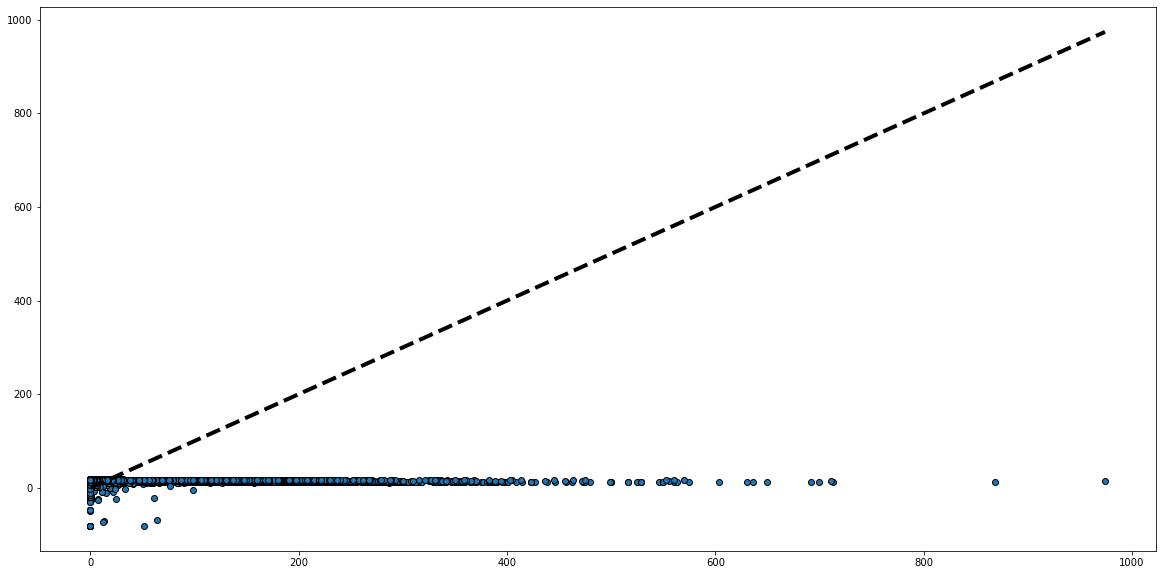

In [89]:
# Tehdään lineaarinen regressio
lr = linear_model.LinearRegression()

y = df_imp.number_of_reviews
X = df_imp.drop(columns='number_of_reviews')

predict = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y, predict, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

plt.show()

Viisi opittua asiaa:
1. Muiden kanssa puhuessa ideat jalostuu mukavasti
2. Vaikka tulisikin hyviä tutkimusideoita, kannattaa pitää mielessä, mihin data taipuu ja millaiset taidot itsellä on
3. Tärkeää on myös pitää mielessä liiketoimintatarpeet
4. Lineaarinen regressio on yksi helpoimpia koneoppimisen tapoja
5. Minun pitäisi keskittyä jatkossa koodaustaitojeni kehittämiseen, onneksi koodi käydään demosessiossa tarkasti läpi ja esimerkkikoodi on saatavilla!

Lähteet
- Luento 30.3. (paikan päällä) + demosessio 1.4. (katsottu tallenteelta)

# Viikko 5
Tällä viikolla meillä oli vierailuluento, jossa puhujana oli Futuricen Teemu Mikkonen ja aiheena luonnolisen kielen analyysi ja tekstidata. Tekstidatan luokittelu kiinnostaa itseäni suuresti. Tämä johtuu edeltävistä kieliopinnoissani, joissa muun muassa korpusanalyysit tulivat tutuiksi.

NLP (Natural Language Processing) on monimuotoista, kompleksista ja siinä ei ole välttämättä selkeää rakennetta, joten sitä on hankalampi hyödyntää koneoppimisessa. Oleellista prosessoinnilla on esikäsitellä teksti hyvin ja saattaa se sellaiseen muotoon, jotta kone pystyy käyttämään sitä. NLP:tä käytetään muun muassa automaattikäännöksissä ja chat-boteissa.

NLP-prosessissa on muutamia vaiheita: Ensin haetaan pakettidata ja hukkasanalistat, tämän jälkeen asennetaan tarvittavat kirjastot ja määritellään hukkasanalista. Sitten aloitetaan esikäsittely, jonka jälkeen varsinainen mallin opettaminen ja analyysi voidaan aloittaa. Itseäni näistä vaiheista kiinnosti eniten esikäsittely, jossa halutaan poistaa turhaa kohinaa, mutta mielestäni sanoja käsitellessä ei ole aivan yksiselitteistä, mikä on turhaa kohinaa ja mikä ei. Eräällä toisella kurssilla esimerkkinä käytettiin Tripadvisorin kommenteista kerättyä datamassaa, josta tehtiin sentimenttianalyysi, ja koneoppimisen kautta tunnistettiin positiivia sanoja. Mutta entä jos positiivista sanaa edeltää negaatio, esim. "ei hyvä"? En tiedä, osasiko kyseinen algoritmi tunnistaa tällaisia tapauksia. Joissain tapauksissa esikäsittelyssä sanat "ei" ja "eikä" saatetaan määrittää hukkasanoiksi, jolloin data saattaa muuttua aivan päinvastaiseksi kun negaatiot poistetaan! Esikäsittelyyn kuuluu myös isojen alkukirjaimien ja välimerkkien poisto, jotka tavallaan ymmärrän, mutta joissain tapauksissa esimerkiksi lauseessa oleva pilkku voi muuttaa lauseen merkitystä. Tässä yhteydessä pohdin myös, osaako algoritmit tunnistaa yhdyssanoja tai onko mahdollista tunnistaa kirjoitusvirheitä.

Luennolla mainittiin, että hukkasanoiksi saatetaan nähdä kaikki alle kolmen merkin mittaiset sanat, jolloin esimerkiksi jotkin lyhenteet (kuten EU) saatetaan poistaa hukkasanoina. Tämä on mielestäni hyvä esimerkki siitä, kuinka on oleellista, että dataa analysoivat henkilöt käyttävät riittävästi aikaa dataan tutustumiseen ennen esikäsittelyn aloittamista, jotta hukkasanalistat ja muut valinnat esikäsittelyssä osataan tehdä oikein. Jos analyyseja on tehnyt paljon samankaltaisilla tekstimassoilla, kiusauksena on varmasti tehdä samanlainen esikäsittely kuin aina ennenkin ilman sen tarkempaa dataan tutustumista. Tärkeää olisi aina myös selvittää, onko jokin opetusdatan alue yliedustettu tai aliedustettu. Toisaalta on hyvä pitää mielessä, että opetusdatan määrän karsiminen vaikeuttaa oppimista.

Esikäsittelyyn kuuluu myös sanojen palauttaminen perusmuotoon. Erityisesti suomen kielessä perusmuotoon palautetut sanat voivat menettää paljon informaatiota (esim. "juoksentelisinkohan"), mutta toisaalta perusmuodossa sanat ovat yhdenmukaisempia. Konekääntäjät yleensä tekevät käännöksiä sana kerrallaan, joten uskon, että vielä tulee menemään melko paljon aikaa ennen kuin Google kääntäjä osaa kääntää englannin lauseen "I wonder if I should run around aimlessly" yhdellä suomen kielen sanalla "juoksentelisinkohan".

Opetusdatasta on tärkeää säästää osa testaamista varten, sillä jos opetusdata on sama kuin testidata, vastaavuudet ovat täydellisiä ja mallin todellista oppimista ei voida ennustaa. Vaikka tämä on sellainen asia, jonka moni varmasti pitää itsestäänselvänä, tällaisia virheitä voi varmasti kiireessä testaillessa todellisuudessa tapahtua, ja siksi on hyvä, että asia on "sanottu ääneen".

Eräs tärkeä asia, josta kurssilla on aikaisemmillakin viikoilla ollut puhetta, oli data-analyytikon tekemien päätösten vaikutukset analyysin tuloksiin. Mielestäni on hienoa, että kurssilla on korostettu sitä, että analyytikko tekee helposti sellaisia valintoja, jotka vastaavat omia ajatuksia ja odotuksia (esim. valitaan tietyt hukkasanat), jolloin datasta löytyy sellaisia asioita kuin sieltä odotetaankin löytyvän. Vaikka tämä ei kuulosta kovin kivalta, on tärkeää kuitenkin tehdä valintoja, mutta toisaalta niiden vaikutukset on myös hyvä tiedostaa.

Kun esikäsittely on valmis, mallia aloitetaan opettamaan. Käytännössä data kirjataan pandakseen, ja hyödynnetään fastText NLP-kirjastoa, joka tutkii sanojen vektoriesityksiä eli vertailee sanoja niiden kontekstiin ja vieressä oleviin sanoihin. Tässä kohtaa aloin miettimään, erottaako algoritmi homonyymejä, eli sanoja, joilla on samanlainen kirjoitusasu, mutta eri merkitys (esim. "kuusi" joka voi olla puu tai numero). Sanat konteksti voi paljastaa sanan merkityksen, mutta näin ei välttämättä ole aina.

Opettamisen yhteydessä kone voi alioppimia tai ylioppia datan. Alioppimisella tarkoitetaan, että sisältöä ei ole tarpeeksi, ja ylioppiminen puolestaan tarkoittaa, että jokin data tunnetaan liian hyvin. Yli- ja alioppiminen voidaan huomata testaamisvaiheessa. Kun kone on saatu opetettua, on viimeisenä vaiheena tärkeää vielä arvioida sen toimintaa. Yksi mittari koneoppimiselle on se, kuinka usein se löytää oikean arvioin. Toisaalta kannattaa myös huomioida onko jakauma tasainen ja laskee muitakin hyödyllisiä tunnuslukuja algoritmin onnistumiselle.

Seuraavaksi demosession oppeja esimerkkikoodia mukaillen:


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
if os.path.exists('out.json'):
    df = pd.read_json('out.json')
else:
    df = pd.read_json('https://raw.githubusercontent.com/InfoTUNI/joda2022/master/koodiesimerkit/out.json')

#tulostetaan esimerkki
df

,text,rating
0,"I got the phone, had it shipped all the way a...",3.0 out of 5 stars
1,Got 2nd phone requirements:Didn't want to spen...,5.0 out of 5 stars
2,I bought this phone back when I had AT&T's pre...,5.0 out of 5 stars
3,There are too many things wrong to name them a...,2.0 out of 5 stars
4,Really nice phone for the money. The phone is ...,4.0 out of 5 stars
...,...,...
1601,didn't like it,1.0 out of 5 stars
1602,Its a new article?,1.0 out of 5 stars
1603,I was foolish enough to order this Lumina 520 ...,1.0 out of 5 stars
1604,excelente,5.0 out of 5 stars


In [91]:
#poistetaan isot kirjaimet ja varmistetaan, että arviointi on float-muotoinen
df['text'] = df['text'].apply(str.lower)
df['rating'].unique()

array(['3.0 out of 5 stars', '5.0 out of 5 stars', '2.0 out of 5 stars',
       '4.0 out of 5 stars', '1.0 out of 5 stars'], dtype=object)

In [92]:
conv_rating = lambda rating: float(rating[:2])

df['rating'] = df['rating'].apply(conv_rating)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1606 non-null   object 
 1   rating  1606 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.2+ KB


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [95]:

reprs = reprs.toarray()
length = np.sqrt((reprs**2).sum(axis=1))[:,None]
reprs = reprs / length

reprs = np.nan_to_num(reprs, nan=0.0, posinf=0.0, neginf=0.0)

print('The shape of the matrix containing the word representations is:', reprs.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [96]:
from sklearn.cluster import KMeans
import numpy as np

k = 6
kmeans = KMeans(n_clusters=k, random_state=11)
clusters = kmeans.fit_predict(reprs)

print(clusters)

[1 1 1 ... 1 2 1]


In [97]:
df['cluster_id'] = clusters

df['cluster_id'].value_counts()

0    691
1    676
5    103
3     67
2     52
4     17
Name: cluster_id, dtype: int64

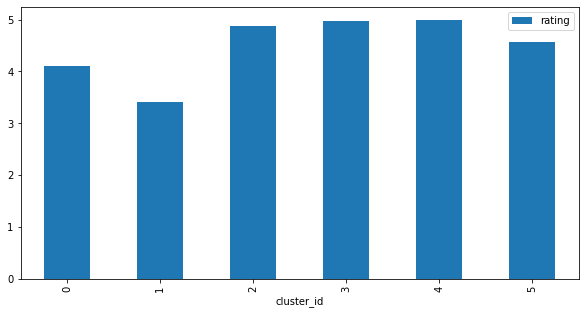

In [98]:
average_ratings = df.groupby('cluster_id').mean()

fig = average_ratings.plot.bar(figsize=(10,5))

Viisi oppia:
1. Luonnollisen kielen analyysissa on tärkeää tehdä laadukas esikäsittely
2. Data-analyytikko joutuu tekemään valintoja, joilla on vaikutuksia analyysin lopputulokseen
3. Koneelle on tärkeää säästää opetusdataa myös testaamista varten
4. Kone saattaa yli- tai alioppia datan
5. Humanistina huomaan kiinnittäväni paljon kieliasioihin huomiota...

Lähteet:
  - Luento 6.4. + demosessio 8.4. (katsottu tallenteelta)  

# Viikko 6

Tällä viikolla syvennyttiin ohjaamattomaan oppimiseen. Ohjaamattomassa oppimisessa on käytössä lähtödata, siitä pyritään tunnistamaan piirteitä ja tekemään matriisi. Tämän jälkeen mallia opetetaan ja arvioidaan sen suorituskykyä. Toisin kuin ohjatussa oppimisessa, ohjaamattomassa oppimisessa ei ole tiettyä muuttujaa tiedossa, jota haluttaisiin ennustaa, vaan oppimisessa käytetään esimerkiksi klusterointia eli ryvästämistä. Kun eri klusterit on tiedossa, arvioidaan niiden luotettavuutta (esim. onko jokin löydetty asiakassegmentti luotettavan oloinen) ja laatua. Kun hyvät klusterit on löydetty, voidaan ennustaa, mihin klusteriin esimerkiksi joku asiakas voisi kuulua. Klusterointi (tai ryvästäminen) on itselleni ennestään tuttua, mutta oli mielenkiintoista oppia lisää.

Klusteroinnin lisäksi ohjaamaton oppiminen voi olla ns. ostoskorinanalyysia tai aihemallinnusta. Ostoskorianalyysista perinteinen esimerkki on ostoskorien analyysi, josta voi olla ainakin vähittäiskaupassa konkreettista hyötyä. Ostoskorianalyysia voidaan hyödyntää myös esimerkiksi Netflixissa, jossa voidaan kuluttajan valintojen mukaan nostaa tai piilottaa sopivia kohteita). Aiheanalyysissa puolestaan tunnistetaan tekstistä aiheita. Aiheanalyysi on luonteeltaan melko subjektiivista, ja sitä voidaan hyödyntää muun muassa "etälukemisessa", jolloin tietokone käy aineistoa läpi ja tunnistaa teemoja tietyistä sanayhdistelmistä


Ryvästämistä voidaan tehdä moniuloitteisessa maailmassa, jolloin otetaan huomioon eri tekijöitä, eikä vain x- ja y-akselit. Toinen vaihtoehto on laittaa ryppään keskelle joku keskipiste. Ryvästäessä on oleellista miettiä, mitkä arvot ovat oleellisia. Lisäksi muuttujat voi olla kannattavaa normalisoida niin, että esim. minimiarvo on 0 ja maksimi arvo 1, mutta tämä kannattaa tehdä vasta sen jälkeen kun on tarkistettu, ettei aineistossa ole yksittäisiä poikkeavia arvoja, jotka voisivat vääristää minimi- tai maksimiarvoja. Tilastotieteessä olen kuullut tällaisia arvoja kutsuttavan "oudokeiksi". Jos tällaisia oudokki-arvoja aiotaan poistaa, siitä tulee kertoa selkeästi ja läpinäkyvästi. Tämä on taas yksi esimerkki niistä lukuisista tilanteista, joissa data-analyytikko voi omilla päätöksillään "työntää" oman totuutensa tutkittuun dataan, joten valinnat on tärkeää tiedostaa ja perustella huolellisesti.

Ryvästämisessä voidaan käyttää KMeans-nimistä metodia. Siinä algoritmille annetaan tieto, kuinka monta klusteria halutaan löytää (kyynärpääperiaate=Vertaillaan eri klustereiden määrillä milloinen virheen määrän pieneneminen ei enää merkittävästi muutu) ja valitaan klustereille keskipisteet. Näiden klustereiden mukaan havainnot jaetaan lähimmän klusterikeskipisteen mukaan. Tämän jälkeen lasketaan syntyneille klustereille uudet keskipisteet ja toistetaan prosessia niin kauan, kunnes keskipisteet eivät enää muutu. Ryvästämisessä on tärkeää tuntea data ja tietää, millaisten asioiden mukaan ryvästämistä kannattaa tehdä, jotta saadaan merkityksellisiä tuloksia.

Lopuksi vielä demosessiossa opitun testailua:

In [99]:

pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [100]:
!pip install efficient_apriori
!pip install networkx
from efficient_apriori import apriori

In [101]:
if os.path.exists('online_retail.csv'):
    df = pd.read_csv('online_retail.csv')
else:
    df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

    df.to_csv('online_retail.csv')

df.describe(include='all')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.00000,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,NaN,25900,4070,4223,NaN,23260,NaN,NaN,38
top,NaN,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,NaN,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,270954.00000,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,156435.79785,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,0.00000,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,135477.00000,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,270954.00000,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,406431.00000,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [102]:
df = df[['Description', 'CustomerID']]
df.isnull().sum()

Description      1454
CustomerID     135080
dtype: int64

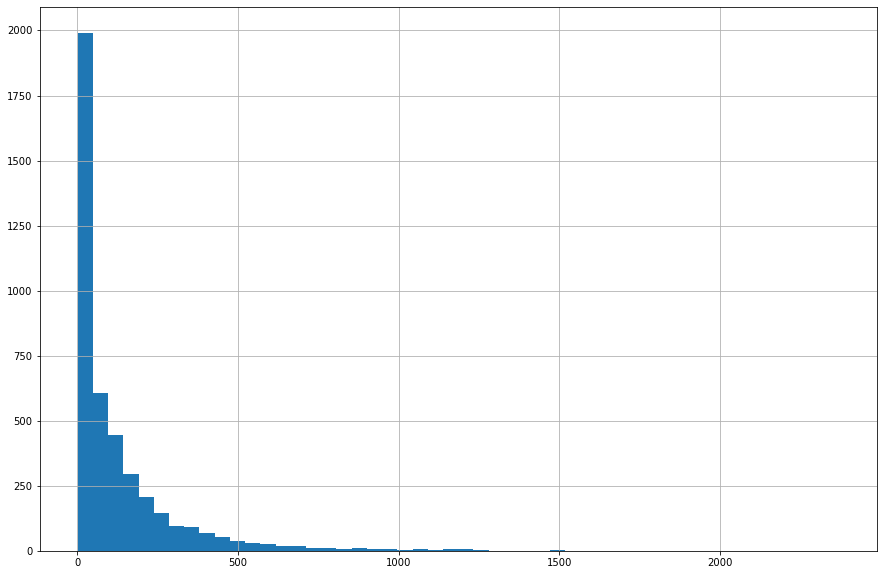

In [103]:
hist = df['Description'].value_counts().hist(bins=50, figsize = (15,10))

In [104]:
grouped_transac = df.groupby('CustomerID').agg(list)
grouped_transac.head()

,Description
CustomerID,
12346.0,"[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI..."
12347.0,"[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ..."
12348.0,"[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES..."
12349.0,"[PARISIENNE CURIO CABINET, SWEETHEART WALL TID..."
12350.0,"[CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEI..."


Viisi opittua asiaa:
1. Ohjaamaton oppiminen on esimerkiksi ryvästämistä, aihemallinnusta tai ostoskorianalyysia
2. Ohjaamattomassakin oppimisessa data-analyytikko tekee analyysiin vaikuttavia päätöksiä, esimerkiksi klustereiden määrää valitessa
3. Klusterointi on hyödyllistä esimerkiksi asiakassegmenttien hahmottamisessa
4. Aiheanalyysissa tietokone tunnistaa aiheita tiettyjen sanayhdistelmien avulla
5. Analyysin tekijän on tärkeää tutustua aineistoon ja tärkeää on huomioida, että huonosta datasta ei saa tehtyä hyvää analyysia

Lähteet
- Luento 20.4. (paikalla) + demosessio 22.4. (tallenne)

# Viikko 7

Esilukemistona viikolle eli artikkeli, joka käsitteli analytiikka hyödyntäviä datatuotteita. Artikkelin mukaan tuotemallin kehittämiseen kuuluu seitsemän askelta: tuotteen konseprualisointi, datan hankinta, jalostaminen, varastointi ja jäljitys, jakelu, presentaatio ja palautteen kerääminen markkinoilta. En ollut pohtinut dataa tuotteistamisen kautta ennen, joten artikkeli oli mielenkiintoista luettavaa. (Davenport & Kudyba 2016).

Viikon aiheena oli visuaalinen analytiikka. Visualisoinnilla on kaksi tärkeää tehtävää data-analyyseja tehdessä: kartoittava analytiikka eli datan kartoittaminen ja visualisointi sekä kommunikointi eli tulosten havainnollistaminen. Molemmat visualisoinnin tavat ovat itselleni tuttuja ennestään ja koen yhtä tärkeiksi, sillä valtavia datamassoja ei voi helposti saada analytiikkaprosessin alussa haltuun, jossei niistä tee itselleen jonkin näköisiä visualisointeja. Toisaalta havaintojen esitysvaiheessa vastaanottajan on myös todella paljon helpompi vastaanotta esitetty tieto, jos sen tukena on visualisointeja.

Visualisoinnossa katsotaan olevan kolme eri osapuolta: suunnittelija (designer), lukija ja data. Suunnittelijan on tärkeää pitää mielessä, miksi visualisointia tehdään ja mikä on visualisoinnin pohjimmainen tavoite. On myös hyvä tiedostaa, onko visualisointi tarkastelevaa vai selittävää. Lukijan puolestaan voidaan ajatella olevan visualisoinnin onnistumisen ”mittari”, sillä visualisoinnin
tavoitteena on saada lukija ymmärtämään asioita. Suunnittelijan on olennaista tuntea lukija ja ottaa lukijan näkökulma ja taustatiedot huomioon laatiessaan visualisointia. Tämä voi tarkoittaa käytännössä sitä, että suunnittelija pohtii, onko tietty ikoni lukijalle tuttu, onko lukija tottunut lukemaan vasemmalta oikealle tai mitä tietyt värivalinnat tarkoittavat lukijan mielestä (tai voiko esimerkiksi värisokeus hankaloittaa kuvaajan ymmärtämistä). (Iliinsky & Steele 2011).

Yksi tapa ymmärtää visualisointien tärkeys on tarkastella huonosti tehtyjä visualisointeja. Näistä oli useita esimerkkejä luentomuistiossa, mutta itselleni tuttu nettisivu on WTF Visualizations (http://viz.wtf/), johon on kerätty toinen toistaan huonompia visualisointeja. Nämä ovat hyviä muistutuksia siitä, että kun käsiteltävä asia on itselle tuttu, sille tulee helposti sokeaksi ja ei esimerkiksi itse huomaa, kuinka sekava jokin visualisointi todellisuudessa on. Toki huonoille visualisoinneille on varmasti muitakin selityksiä, kuten se, että aiheeseen ei ole ollenkaan perehdytty tai mietitty tulkitsijan näkökulmaa.

Jotta osataan valita oikeanlainen visualisointi, kannattaa erilaisiin visualisointityyppeihin tutustua. Niitä ovat esimerkiksi korrelaatio, frekvenssi, aikasarjat, lajitellut luokat, kokonaisuuden osat ja erokuvaajat. Oikeanlaisen visualisoinnin löytäminen on todella tärkeää, sillä lukijan pitäisi pystyä yhdellä silmäyksellä ymmärtämään, mistä visualisoinnissa on kyse. Esimerkiksi PowerBI:ssa erilaisia visualisointivaihtoehtoja on kuitenkin yli 30, joten valinta ei aina ole helppo. Visualisointia valittaessa kannattaa huomioida esimerkiksi paljonko visualisointeja on määrällisesti (yksi vai peräti miljoona), halutaanko kuvata trendejä trendiviivoilla, jakaumia vai esimerkiksi osuuksia. (Giovanni 2017).

Viisi opittua asiaa:
1. Datan visualisointi ja visualisointitavan valinta on todella tärkeää
2. Visualisointia luodessa kannattaa tavoitteena pitää, että lukija saisi yhdellä vilkaisulla käsityksen, mistä visualisoinnissa on kyse
3. Erilaisia visualisointitapoja on kymmeniä, mutta tavan valintaan kannattaa kiinnittää huomiota
4. Huonosti tehdyt visualisoinnit ovat opettavaisia
5. Erilaisia visualisointityökaluja on paljon saatavilla

Lähteet

-luento 27.4.

-Davenport, T. & Kudyba, S. (2016). Designing And Developing Analytics-Based Data Products. MIT Sloan Management Review: Cambridge Vol 58, Iss 1.

-Giovanni, M. (2017). How to Choose The Right Visualization. Saatavilla: https://associationanalytics.com/blog/choose-right-visualization/

-Iliinsky, N. & Steele, J. (2011).Designing Data Visualizations. Sebastopol (CA): O’Reilly Media
-WTF Visualizations (2022). Saatavilla: https://viz.wtf/ [luettu 9.4.2022]